<a href="https://colab.research.google.com/github/PBustamante65/Python/blob/main/World_Bank_Development_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#We import our database
df_train = pd.read_csv('/content/drive/MyDrive/Data Science/World Bank Development/world_bank_development_indicators.csv')

In [ ]:
#We review our database
df_train.columns

Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'risk_premium_on_lending',
       'research_and_development_expenditure%', 'central_goverment_debt%',
       'tax_revenue%', 'expense%', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet%', 'logistic_performance_index',
       'military_expenditure%', 'GDP_current_US',
       'political_stability_estimate', 'political_stability_std',
       'rule_of_law_estimate', 'rule_of_law_std',
       'reg

In [ ]:
US_data = df_train[df_train['country'] == 'United States']
display(US_data)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
15961,United States,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23.7,9.500,69.770732,180671000.0,54208527.0,NaN,NaN,NaN
15962,United States,1961-01-01,48.860242,NaN,9158960.0,715.0,NaN,NaN,NaN,NaN,...,NaN,NaN,23.3,9.300,70.270732,183691000.0,54414785.0,NaN,NaN,NaN
15963,United States,1962-01-01,48.476137,NaN,9158960.0,715.0,NaN,NaN,NaN,NaN,...,NaN,NaN,22.4,9.500,70.119512,186538000.0,54549307.0,NaN,NaN,NaN
15964,United States,1963-01-01,48.197940,NaN,9158960.0,715.0,NaN,NaN,NaN,NaN,...,NaN,NaN,21.7,9.600,69.917073,189242000.0,54626596.0,NaN,NaN,NaN
15965,United States,1964-01-01,47.932516,NaN,9158960.0,715.0,NaN,NaN,NaN,NaN,...,NaN,NaN,21.1,9.400,70.165854,191889000.0,54673014.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16019,United States,2018-01-01,44.363367,33.866926,9147420.0,715.0,6.968967,1.324425,0.140639,100.0,...,NaN,41.4,11.6,8.678,78.639024,326838199.0,57994170.0,0.976354,0.138570,4.929848
16020,United States,2019-01-01,44.363367,33.866926,9147420.0,715.0,6.944388,1.211969,0.149919,100.0,...,NaN,41.5,11.4,8.700,78.787805,328329953.0,57592357.0,0.903776,0.132055,4.985947
16021,United States,2020-01-01,44.363367,33.866926,9147420.0,715.0,5.664516,1.065649,0.151478,100.0,...,NaN,39.7,10.9,10.300,76.980488,331511512.0,57470836.0,0.868967,0.140971,6.420751
16022,United States,2021-01-01,NaN,NaN,NaN,NaN,5.770089,1.046862,0.159642,100.0,...,NaN,NaN,11.0,10.400,76.329268,332031554.0,56867044.0,0.903907,0.143370,6.807466


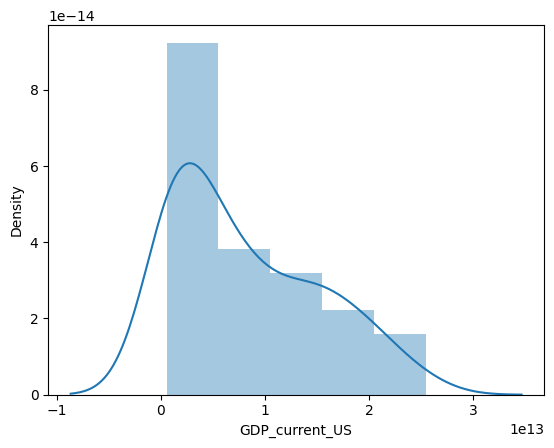

In [ ]:
sns.distplot(US_data['GDP_current_US']);

In [ ]:
sns.set()
cols = ['GDP_current_US', 'agricultural_land%', 'forest_land%', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'research_and_development_expenditure%', 'central_goverment_debt%',
       'tax_revenue%', 'expense%', 'goverment_effectiveness_std', 'human_capital_index', 'individuals_using_internet%', 'military_expenditure%',
       'political_stability_std',
       'rule_of_law_std',
       'government_expenditure_on_education%',
       'government_health_expenditure%', 'gini_index', 'birth_rate',
       'death_rate', 'life_expectancy_at_birth', 'population',
       'rural_population',
       'voice_and_accountability_std', 'intentional_homicides']
sns.pairplot(US_data[cols], size = 2.5)
plt.show();

In [ ]:
total = US_data.isnull().sum().sort_values(ascending=False)
percent = (US_data.isnull().sum()/US_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
time_to_get_operation_license,63,1.000000
multidimensional_poverty_headcount_ratio%,63,1.000000
doing_business,62,0.984127
human_capital_index,59,0.936508
statistical_performance_indicators,59,0.936508
logistic_performance_index,56,0.888889
government_expenditure_on_education%,52,0.825397
government_health_expenditure%,42,0.666667
rule_of_law_estimate,40,0.634921
political_stability_estimate,40,0.634921


In [ ]:
US_data = US_data.drop((missing_data[missing_data['Percent'] > .15]).index,1)

In [ ]:
total = US_data.isnull().sum().sort_values(ascending=False)
percent = (US_data.isnull().sum()/US_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
electric_power_consumption,8,0.126984
agricultural_land%,3,0.047619
land_area,3,0.047619
avg_precipitation,3,0.047619
population_density,3,0.047619
real_interest_rate,2,0.031746
birth_rate,1,0.015873
life_expectancy_at_birth,1,0.015873
risk_premium_on_lending,1,0.015873
military_expenditure%,1,0.015873


In [ ]:
US_data = US_data.drop((missing_data[missing_data['Percent'] > .15]).index,1)

In [ ]:
total = US_data.isnull().sum().sort_values(ascending=False)
percent = (US_data.isnull().sum()/US_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
electric_power_consumption,6,0.1
country,0,0.0
risk_premium_on_lending,0,0.0
population,0,0.0
life_expectancy_at_birth,0,0.0
death_rate,0,0.0
birth_rate,0,0.0
GDP_current_US,0,0.0
military_expenditure%,0,0.0
real_interest_rate,0,0.0


In [ ]:
noNull_columns = ['real_interest_rate', 'agricultural_land%', 'land_area', 'avg_precipitation', 'population_density' ]
US_data = US_data.drop(US_data.loc[US_data[noNull_columns].isnull().any(axis=1)].index)


In [ ]:
display(US_data)

,country,date,agricultural_land%,electric_power_consumption,population_density,inflation_annual%,real_interest_rate,risk_premium_on_lending,military_expenditure%,GDP_current_US,...,NormPopDen,NormInf,NormReInt,NormRiskPre,NormMil,NormBirth,NormDeath,NormLife,NormPop,NormPopRur
15962,United States,1961,48.860242,4182.175501,20.055880,1.070724,3.107885,2.124167,9.156032,5.633000,...,2.998522,0.068335,1.133942,4.512084,2.214413,3.148453,2.230014,346995.168029,19.028766,7376.637784
15963,United States,1962,48.476137,4433.606021,20.366723,1.198773,3.215346,1.721667,9.331673,6.051000,...,3.013902,0.181299,1.167935,2.964136,2.233414,3.109061,2.251292,344759.830440,19.044146,7385.750267
15964,United States,1963,48.197940,4690.486256,20.661953,1.239669,3.374882,1.343333,8.831891,6.386000,...,3.028294,0.214845,1.216360,1.804544,2.178369,3.077312,2.261763,341782.419180,19.058537,7390.980720
15965,United States,1964,47.932516,4970.446456,20.950959,1.278912,2.951669,0.947500,8.051281,6.858000,...,3.042184,0.246009,1.082371,0.897756,2.085831,3.049273,2.240710,345443.829904,19.072428,7394.120232
15966,United States,1965,47.589792,5234.685002,21.214527,1.585169,2.565913,0.586667,7.587247,7.437000,...,3.054686,0.460691,0.942314,0.344178,2.026469,2.965273,2.240710,346164.806080,19.084929,7391.883860
15967,United States,1966,47.554526,5590.333740,21.460952,3.015075,2.649421,0.743333,8.435300,8.150000,...,3.066235,1.103625,0.974341,0.552544,2.132425,2.912351,2.251292,346128.733469,19.096478,7385.884984
15968,United States,1967,47.527994,5888.340915,21.695913,2.772786,2.406227,1.301667,9.417796,8.617000,...,3.077124,1.019852,0.878060,1.694336,2.242601,2.879198,2.240710,351312.603662,19.107367,7377.211058
15969,United States,1968,47.581276,6385.459329,21.913623,4.271796,1.863911,0.965833,9.268454,9.425000,...,3.087109,1.452034,0.622677,0.932834,2.226617,2.867899,2.282382,342283.426416,19.117352,7364.971419
15970,United States,1969,47.543280,6904.833800,22.128822,5.462386,2.851773,1.263333,8.633264,10.199000,...,3.096881,1.697886,1.047941,1.596011,2.155623,2.884801,2.251292,350511.739373,19.127124,7351.726056
15971,United States,1970,47.428966,7236.657043,22.388131,5.838255,2.250162,1.473333,8.032744,10.733030,...,3.108531,1.764432,0.811002,2.170711,2.083526,2.912351,2.251292,355004.956933,19.138774,7357.283942


In [ ]:
US_data['GDP_current_US'] = US_data['GDP_current_US'] / 1e11



In [ ]:
columns_to_drop = ['land_area', 'avg_precipitation']
US_data = US_data.drop(columns=columns_to_drop)

In [ ]:
US_data.columns

Index(['country', 'date', 'agricultural_land%', 'electric_power_consumption',
       'population_density', 'inflation_annual%', 'real_interest_rate',
       'risk_premium_on_lending', 'military_expenditure%', 'GDP_current_US',
       'birth_rate', 'death_rate', 'life_expectancy_at_birth', 'population',
       'rural_population'],
      dtype='object')

In [ ]:
sns.set()
cols = ['GDP_current_US','date', 'agricultural_land%',
       'electric_power_consumption', 'population_density',
       'inflation_annual%', 'real_interest_rate', 'risk_premium_on_lending',
       'military_expenditure%','birth_rate', 'death_rate',
       'life_expectancy_at_birth', 'population', 'rural_population']
sns.pairplot(US_data[cols], size = 2.5)
plt.show();

In [ ]:
#We try to find the normality of the price
sns.distplot(US_data['GDP_current_US'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['GDP_current_US'], plot=plt)

In [ ]:
#We give it a log transformation for left skewness
US_data['NormGDP'] = np.log(US_data['GDP_current_US'])
sns.distplot(US_data['NormGDP'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormGDP'], plot=plt)

In [ ]:
"""
US_data['NormGDP'] = np.power(US_data['GDP_current_US'], 1/2)
sns.distplot(US_data['NormGDP'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormGDP'], plot=plt)
"""

In [ ]:
sns.distplot(US_data['agricultural_land%'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['agricultural_land%'], plot=plt)

In [ ]:

US_data['NormAgLand'] = np.power(US_data['agricultural_land%'], 2)
sns.distplot(US_data['NormAgLand'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormAgLand'], plot=plt)

In [ ]:
sns.distplot(US_data['electric_power_consumption'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['electric_power_consumption'], plot=plt)

In [ ]:
US_data['NormEPC'] = np.power(US_data['electric_power_consumption'], 2)
sns.distplot(US_data['NormEPC'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormEPC'], plot=plt)

In [ ]:
sns.distplot(US_data['population_density'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['population_density'], plot=plt)

In [ ]:
US_data['NormPopDen'] = np.log(US_data['population_density'])
sns.distplot(US_data['NormPopDen'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormPopDen'], plot=plt)

In [ ]:
sns.distplot(US_data['inflation_annual%'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['inflation_annual%'], plot=plt)

In [ ]:
US_data['NormInf'] = np.log(US_data['inflation_annual%'])
sns.distplot(US_data['NormInf'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormInf'], plot=plt)

In [ ]:
sns.distplot(US_data['real_interest_rate'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['real_interest_rate'], plot=plt)

In [ ]:
US_data['NormReInt'] = np.log(US_data['real_interest_rate'])
sns.distplot(US_data['NormReInt'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormReInt'], plot=plt)

In [ ]:
sns.distplot(US_data['risk_premium_on_lending'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['risk_premium_on_lending'], plot=plt)

In [ ]:
US_data['NormRiskPre'] = np.power(US_data['risk_premium_on_lending'],2)
sns.distplot(US_data['NormRiskPre'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormRiskPre'], plot=plt)

In [ ]:
sns.distplot(US_data['military_expenditure%'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['military_expenditure%'], plot=plt)

In [ ]:
US_data['NormMil'] = np.log(US_data['military_expenditure%'])
sns.distplot(US_data['NormMil'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormMil'], plot=plt)

In [ ]:
columns_to_plot = ['birth_rate', 'death_rate', 'life_expectancy_at_birth', 'population', 'rural_population']

for column in columns_to_plot:
    sns.distplot(US_data[column], fit=norm)
    fig = plt.figure()
    res = stats.probplot(US_data[column], plot=plt)
    plt.show()  # Show the plot for each column

In [ ]:
US_data['NormBirth'] = np.log(US_data['birth_rate'])
sns.distplot(US_data['NormBirth'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormBirth'], plot=plt)


In [ ]:
US_data['NormDeath'] = np.log(US_data['death_rate'])
sns.distplot(US_data['NormDeath'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormDeath'], plot=plt)

In [ ]:
US_data['NormLife'] = np.power(US_data['life_expectancy_at_birth'], 3)
sns.distplot(US_data['NormLife'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormLife'], plot=plt)

In [ ]:
US_data['NormPop'] = np.log(US_data['population'])
sns.distplot(US_data['NormPop'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormPop'], plot=plt)

In [ ]:
US_data['NormPopRur'] = np.power(US_data['rural_population'],1/2)
sns.distplot(US_data['NormPopRur'], fit=norm);
fig = plt.figure()
res = stats.probplot(US_data['NormPopRur'], plot=plt)

In [ ]:
US_data.columns

Index(['country', 'date', 'agricultural_land%', 'electric_power_consumption',
       'population_density', 'inflation_annual%', 'real_interest_rate',
       'risk_premium_on_lending', 'military_expenditure%', 'GDP_current_US',
       'birth_rate', 'death_rate', 'life_expectancy_at_birth', 'population',
       'rural_population', 'NormGDP', 'NormAgLand', 'NormEPC', 'NormPopDen',
       'NormInf', 'NormReInt', 'NormRiskPre', 'NormMil', 'NormBirth',
       'NormDeath', 'NormLife', 'NormPop', 'NormPopRur'],
      dtype='object')

In [ ]:
US_data['date'] = US_data['date'].str.split('-').str[0]


In [ ]:
display(US_data)

,country,date,agricultural_land%,electric_power_consumption,population_density,inflation_annual%,real_interest_rate,risk_premium_on_lending,military_expenditure%,GDP_current_US,...,NormPopDen,NormInf,NormReInt,NormRiskPre,NormMil,NormBirth,NormDeath,NormLife,NormPop,NormPopRur
15962,United States,1961,48.860242,4182.175501,20.055880,1.070724,3.107885,2.124167,9.156032,5.633000,...,2.998522,0.068335,1.133942,4.512084,2.214413,3.148453,2.230014,346995.168029,19.028766,7376.637784
15963,United States,1962,48.476137,4433.606021,20.366723,1.198773,3.215346,1.721667,9.331673,6.051000,...,3.013902,0.181299,1.167935,2.964136,2.233414,3.109061,2.251292,344759.830440,19.044146,7385.750267
15964,United States,1963,48.197940,4690.486256,20.661953,1.239669,3.374882,1.343333,8.831891,6.386000,...,3.028294,0.214845,1.216360,1.804544,2.178369,3.077312,2.261763,341782.419180,19.058537,7390.980720
15965,United States,1964,47.932516,4970.446456,20.950959,1.278912,2.951669,0.947500,8.051281,6.858000,...,3.042184,0.246009,1.082371,0.897756,2.085831,3.049273,2.240710,345443.829904,19.072428,7394.120232
15966,United States,1965,47.589792,5234.685002,21.214527,1.585169,2.565913,0.586667,7.587247,7.437000,...,3.054686,0.460691,0.942314,0.344178,2.026469,2.965273,2.240710,346164.806080,19.084929,7391.883860
15967,United States,1966,47.554526,5590.333740,21.460952,3.015075,2.649421,0.743333,8.435300,8.150000,...,3.066235,1.103625,0.974341,0.552544,2.132425,2.912351,2.251292,346128.733469,19.096478,7385.884984
15968,United States,1967,47.527994,5888.340915,21.695913,2.772786,2.406227,1.301667,9.417796,8.617000,...,3.077124,1.019852,0.878060,1.694336,2.242601,2.879198,2.240710,351312.603662,19.107367,7377.211058
15969,United States,1968,47.581276,6385.459329,21.913623,4.271796,1.863911,0.965833,9.268454,9.425000,...,3.087109,1.452034,0.622677,0.932834,2.226617,2.867899,2.282382,342283.426416,19.117352,7364.971419
15970,United States,1969,47.543280,6904.833800,22.128822,5.462386,2.851773,1.263333,8.633264,10.199000,...,3.096881,1.697886,1.047941,1.596011,2.155623,2.884801,2.251292,350511.739373,19.127124,7351.726056
15971,United States,1970,47.428966,7236.657043,22.388131,5.838255,2.250162,1.473333,8.032744,10.733030,...,3.108531,1.764432,0.811002,2.170711,2.083526,2.912351,2.251292,355004.956933,19.138774,7357.283942


In [ ]:

features = ['NormAgLand', 'NormEPC', 'NormPopDen', 'NormInf', 'NormReInt', 'NormRiskPre', 'NormMil', 'NormBirth', 'NormDeath', 'NormLife', 'NormPop', 'NormPopRur']


In [ ]:
y = US_data['NormGDP']
X = US_data[features]

In [ ]:
display(X)

,NormAgLand,NormEPC,NormPopDen,NormInf,NormReInt,NormRiskPre,NormMil,NormBirth,NormDeath,NormLife,NormPop,NormPopRur
15962,2387.323226,1.749059e+07,2.998522,0.068335,1.133942,4.512084,2.214413,3.148453,2.230014,346995.168029,19.028766,7376.637784
15963,2349.935861,1.965686e+07,3.013902,0.181299,1.167935,2.964136,2.233414,3.109061,2.251292,344759.830440,19.044146,7385.750267
15964,2323.041372,2.200066e+07,3.028294,0.214845,1.216360,1.804544,2.178369,3.077312,2.261763,341782.419180,19.058537,7390.980720
15965,2297.526124,2.470534e+07,3.042184,0.246009,1.082371,0.897756,2.085831,3.049273,2.240710,345443.829904,19.072428,7394.120232
15966,2264.788289,2.740193e+07,3.054686,0.460691,0.942314,0.344178,2.026469,2.965273,2.240710,346164.806080,19.084929,7391.883860
15967,2261.432928,3.125183e+07,3.066235,1.103625,0.974341,0.552544,2.132425,2.912351,2.251292,346128.733469,19.096478,7385.884984
15968,2258.910256,3.467256e+07,3.077124,1.019852,0.878060,1.694336,2.242601,2.879198,2.240710,351312.603662,19.107367,7377.211058
15969,2263.977788,4.077409e+07,3.087109,1.452034,0.622677,0.932834,2.226617,2.867899,2.282382,342283.426416,19.117352,7364.971419
15970,2260.363475,4.767673e+07,3.096881,1.697886,1.047941,1.596011,2.155623,2.884801,2.251292,350511.739373,19.127124,7351.726056
15971,2249.506791,5.236921e+07,3.108531,1.764432,0.811002,2.170711,2.083526,2.912351,2.251292,355004.956933,19.138774,7357.283942


In [ ]:
X.head()

,NormAgLand,NormEPC,NormPopDen,NormInf,NormReInt,NormRiskPre,NormMil,NormBirth,NormDeath,NormLife,NormPop,NormPopRur
15962,2387.323226,1.749059e+07,2.998522,0.068335,1.133942,4.512084,2.214413,3.148453,2.230014,346995.168029,19.028766,7376.637784
15963,2349.935861,1.965686e+07,3.013902,0.181299,1.167935,2.964136,2.233414,3.109061,2.251292,344759.830440,19.044146,7385.750267
15964,2323.041372,2.200066e+07,3.028294,0.214845,1.216360,1.804544,2.178369,3.077312,2.261763,341782.419180,19.058537,7390.980720
15965,2297.526124,2.470534e+07,3.042184,0.246009,1.082371,0.897756,2.085831,3.049273,2.240710,345443.829904,19.072428,7394.120232
15966,2264.788289,2.740193e+07,3.054686,0.460691,0.942314,0.344178,2.026469,2.965273,2.240710,346164.806080,19.084929,7391.883860


In [ ]:
y.head()

15962    1.728642
15963    1.800224
15964    1.854108
15965    1.925416
15966    2.006468
Name: NormGDP, dtype: float64

In [ ]:
total = US_data.isnull().sum().sort_values(ascending=False)
percent = (US_data.isnull().sum()/US_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
country,0,0.0
date,0,0.0
NormPop,0,0.0
NormLife,0,0.0
NormDeath,0,0.0
NormBirth,0,0.0
NormMil,0,0.0
NormRiskPre,0,0.0
NormReInt,0,0.0
NormInf,0,0.0


In [ ]:
noNull_columns1 = ['NormReInt', 'NormInf', 'NormEPC', 'electric_power_consumption']
US_data = US_data.drop(US_data.loc[US_data[noNull_columns1].isnull().any(axis=1)].index)


In [ ]:
non_float_elements = []

for item in X:
    if not isinstance(item, float):
        non_float_elements.append(item)

if non_float_elements:
    print("Non-float elements:", non_float_elements)
else:
    print("The list contains only floats.")


Non-float elements: ['NormAgLand', 'NormEPC', 'NormPopDen', 'NormInf', 'NormReInt', 'NormRiskPre', 'NormMil', 'NormBirth', 'NormDeath', 'NormLife', 'NormPop', 'NormPopRur']


In [ ]:
are_all_floats = all(isinstance(item, float) for item in X)

if are_all_floats:
    print("The list contains only floats.")
else:
    print("The list contains non-float elements.")


The list contains non-float elements.


In [ ]:
X = X.astype(float)

In [ ]:
X.describe()

,NormAgLand,NormEPC,NormPopDen,NormInf,NormReInt,NormRiskPre,NormMil,NormBirth,NormDeath,NormLife,NormPop,NormPopRur
count,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2148.475792,1.172048e+08,3.286092,1.186864,1.182892,7.448893,1.671689,2.747967,2.168783,415388.853696,19.316239,7646.568999
std,111.351347,5.624988e+07,0.163301,0.601827,0.683580,4.730338,0.324975,0.141899,0.053618,46862.639874,0.163134,162.255084
min,1941.724143,1.749059e+07,2.998522,0.068335,-0.553266,0.344178,1.126771,2.517696,2.078816,341782.419180,19.028766,7351.726056
25%,2044.872585,7.297507e+07,3.148277,0.810616,0.735314,3.261867,1.403983,2.658505,2.140066,370255.063664,19.178520,7499.495584
50%,2172.989573,1.230880e+08,3.279939,1.158301,1.192148,8.010369,1.639885,2.740819,2.163323,417936.103165,19.310182,7700.281294
75%,2218.533257,1.693820e+08,3.429901,1.487611,1.804661,10.369823,1.878898,2.788079,2.213709,450982.680152,19.460468,7763.281579
max,2387.323226,1.878154e+08,3.549794,2.606328,2.151136,22.968056,2.242601,3.148453,2.282382,490076.672250,19.578776,7852.189567


In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
#We begin testing different models, from linear ones, like a Linear Regression and the Ridge regression, and also an ensemble one, Random Forest Regressor, which in the end, is the one we end up using
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
import lightgbm as lgb
import xgboost as xgb


alpha = 1
GDP_model = xgb.XGBRegressor()
GDP_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = GDP_model.predict(X)

In [ ]:
#Here we calculate the MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.047308112843469e-07


In [ ]:
print(y_pred)

[1.728533  1.8005238 1.8535298 1.9264709 2.0066977 2.0965343 2.1537051
 2.24334   2.323135  2.3731256 2.45498   2.5489078 2.657445  2.7379804
 2.930614  3.0356307 3.1560245 3.2691503 3.3517375 3.4690046 3.509818
 3.5930176 3.6969514 3.7707133 3.8254008 3.8821425 3.958992  4.0325446
 4.088097  4.1214633 4.1772676 4.228022  4.287046  4.336556  4.3912516
 4.45145   4.5070415 4.5674334 4.6299314 4.663151  4.692935  4.742099
 4.805286  4.8712206 4.9287114 4.973929  4.9950457 5.0138326 5.049816
 5.0913243 5.126258  5.166388 ]


In [ ]:
original_predictions = np.exp(y_pred)

print(original_predictions)

[  5.6323857   6.052817    6.3823085   6.8652396   7.4387116   8.1379175
   8.616726    9.424758   10.2076235  10.73088    11.646199   12.793122
  14.259808   15.455739   18.739132   20.8141     23.477076   26.28899
  28.552301   32.10477    33.442184   36.343582   40.324184   43.41102
  45.851173   48.528076   52.404476   56.404255   59.626324   61.649384
  65.18749    68.58145    72.75124    76.44381    80.74141    85.75118
  90.65321    96.29663   102.50704   105.969444  109.173134  114.67462
 122.15442   130.48009   138.20131   144.59387   147.67969   150.48036
 155.99379   162.60506   168.38582   175.28058  ]


In [ ]:
number = original_predictions[0] * 1e11
#scientific_notation = f"{number:.2e}"
#print(scientific_notation)

print(number)

563238573074.3408


In [ ]:
first_gdp_value = US_data['GDP_current_US'].iloc[0]


number2 = first_gdp_value * 1e11
print(number2)

563300000000.0


In [ ]:
Precission = (number*100)/number2
print(f'The precission is :', Precission)

The precission is : 99.98909516675675


In [ ]:
GDP_model.save_model('GDP_predict.bin')